In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as stats  # For normal distribution
import statsmodels.formula.api as smf
import seaborn as sns

In [63]:
import pandas as pd
print("pandas version:", pd.__version__)

pandas version: 2.2.3


In [64]:
import statsmodels
print("statsmodels version:", statsmodels.__version__)

statsmodels version: 0.13.5


In [8]:
sector_concentration = pd.read_csv('/Users/danielseymour/Documents/EC334-Advanced-Macro/Class 4 Problem Set-20250218/sectorconcentration.csv')
print("Sector Concentration Data:")
print(sector_concentration.head())  # Display the first few rows
# You can use other pandas functions like .describe(), .info(), etc.
# to explore the data further. For example:
# print(sector_concentration.info())
# print(sector_concentration.describe())

Sector Concentration Data:
   year  naics_4  dherfindahl
0  2001   111339    -0.012157
1  2002   111339     0.000619
2  2003   111339    -0.017560
3  2004   111339    -0.005454
4  2005   111339    -0.006647


In [9]:
sector_markups = pd.read_csv('/Users/danielseymour/Documents/EC334-Advanced-Macro/Class 4 Problem Set-20250218/sectormarkups.csv')
print("\nSector Markups Data:")
print(sector_markups.head())  # Display the first few rows
# Explore the data as needed:
# print(sector_markups.info())
# print(sector_markups.describe())


Sector Markups Data:
   year  naics_4   dmarkup
0  2001   111339  0.011806
1  2002   111339  0.010952
2  2003   111339 -0.018640
3  2004   111339 -0.025250
4  2005   111339 -0.009341


In [10]:
# Merge on NAICS and year
merged_data = pd.merge(sector_concentration, sector_markups, on=['year', 'naics_4'], how='inner')

# Calculate descriptive statistics
desc_stats = merged_data.describe()

# Rounding and formatting
desc_stats['year'] = desc_stats['year'].astype(int)  # Convert year to integers
desc_stats['naics_4'] = desc_stats['naics_4'].astype(int)  # Convert naics_4 to integers

# Round other columns to 3 decimal places
cols_to_round = ['dherfindahl', 'dmarkup']
desc_stats[cols_to_round] = desc_stats[cols_to_round].round(4)


# More elegant printing (optional, but makes the output nicer in Jupyter)
print(desc_stats.to_string())  # to_string() for better formatting in console/Jupyter


       year  naics_4  dherfindahl    dmarkup
count  2940     2940    2940.0000  2940.0000
mean   2008   391160       0.0066     0.0016
std       4   107166       0.0726     0.0293
min    2001   111339      -0.4945    -0.0995
25%    2004   326193      -0.0066    -0.0138
50%    2008   335612       0.0000     0.0017
75%    2012   443384       0.0117     0.0171
max    2015   812930       0.6235     0.0997


## What are the columns?
NAICS: North American Industry Classification System.
dherfindahl: changes in concentration measured through the Herfindahl index (based on data for firms
that are listed on the stock market). HHI = s₁² + s₂² + ... + sₙ²
dmarkup: changes in yearly sector averages for markups from De Loecker, Eeckhout and Unger (2020)

## Are the summary statistics means in line with our expectations? 
dherfindahl mean: 0.0066 - this is saying that on average concentration has increased a very small amount. My prior is that concentration has actually increased quite a lot so this is a little low. At the same time, this is across all sectors and perhaps it's only the salient ones to me like technology that seem to have increased in concentration. However, if this is the mean increase then compounded over 14 years this results in overall a large increase in concentration which justifies why this is quite small. 

dmarkup mean: 0.0016 - again, my prior is that markups have increased significantly over time. The reasoning from above also applies that is reasonable given compounding. 


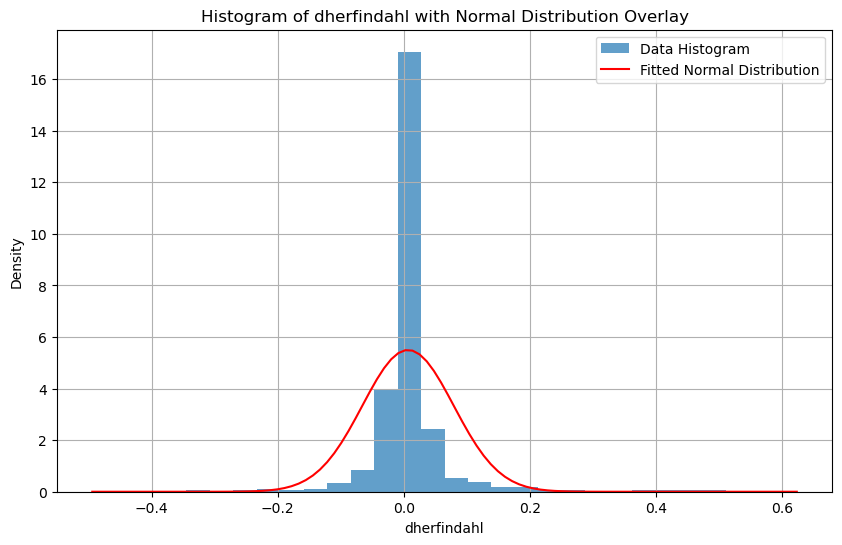

In [11]:
'''Plot the histogram of dherfindahl and dmarkup. Compare the distribution of these variables
to a normal distribution. Are the variables fatter tailed than the normal distribution? Are
there clear outliers that we should be worried about?'''

column_name = 'dherfindahl'  # Replace with the actual column name you want to plot

# 2. Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(merged_data[column_name], bins=30, density=True, alpha=0.7, label='Data Histogram')  # Adjust bins and alpha

# 3. Fit a normal distribution to the data (optional, but often useful)
mu, sigma = stats.norm.fit(merged_data[column_name])  # Get mean (mu) and std dev (sigma)

# 4. Plot the normal distribution curve
x = np.linspace(merged_data[column_name].min(), merged_data[column_name].max(), 100)  # Create x-values for the curve
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', label='Fitted Normal Distribution')  # Plot the curve

# 5. Add labels and title
plt.xlabel(column_name)
plt.ylabel('Density')
plt.title(f'Histogram of {column_name} with Normal Distribution Overlay')
plt.legend()

# 6. Show the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.show()

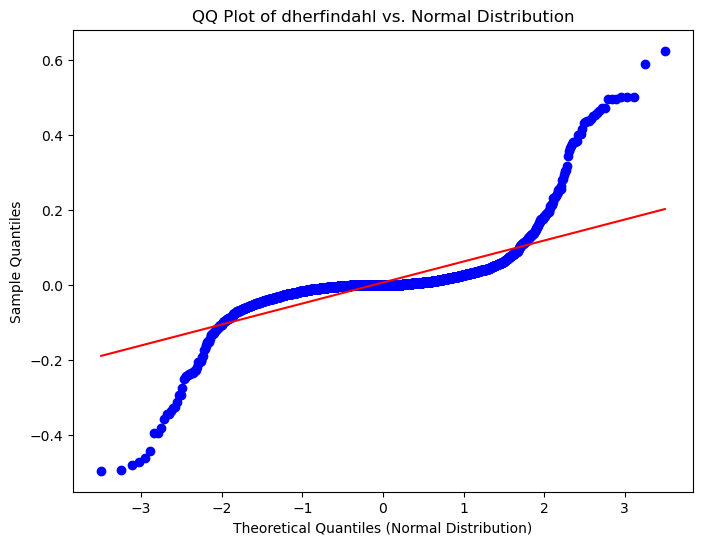

In [19]:
def plot_qq_plot(data, column_name):
    """Generates a QQ plot to compare data against a normal distribution."""
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column_name} vs. Normal Distribution')
    plt.ylabel("Sample Quantiles")
    plt.xlabel("Theoretical Quantiles (Normal Distribution)")
    plt.show()
    
plot_qq_plot(merged_data['dherfindahl'], 'dherfindahl')


## How to interpret QQ Plots?
If the data was perfectly normally distributed, the blue points in the QQ plot would fall almost exactly along the red diagonal line. This line represents the ideal 1:1 relationship between the quantiles of your data and a normal distribution. Departures from the red line indicate that the data is not perfectly normally distributed. The pattern of deviation tells us about the nature of the non-normality (e.g., skewness, kurtosis, tail behavior).

There are 6 quantiles, as we can we that the +/- 3 band is where the fat tail occurs. 

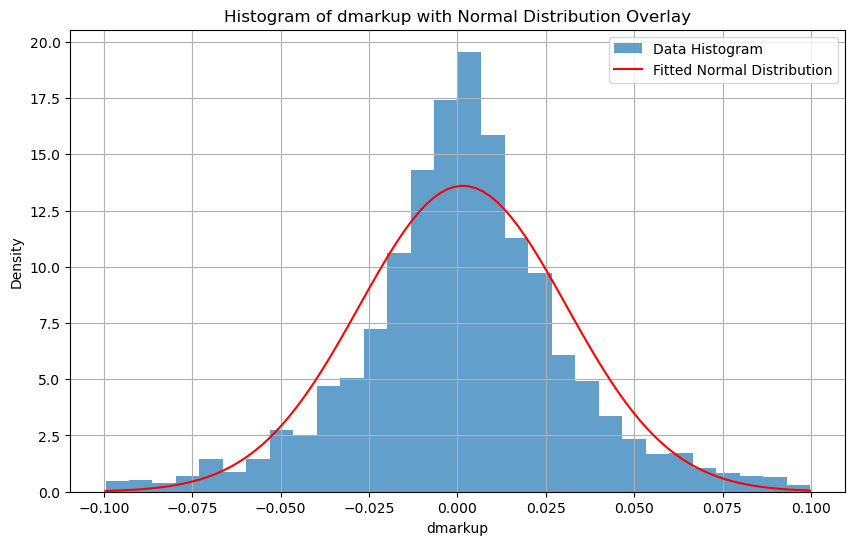

In [12]:
column_name = 'dmarkup'  # Replace with the actual column name you want to plot

# 2. Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(merged_data[column_name], bins=30, density=True, alpha=0.7, label='Data Histogram')  # Adjust bins and alpha

# 3. Fit a normal distribution to the data (optional, but often useful)
mu, sigma = stats.norm.fit(merged_data[column_name])  # Get mean (mu) and std dev (sigma)

# 4. Plot the normal distribution curve
x = np.linspace(merged_data[column_name].min(), merged_data[column_name].max(), 100)  # Create x-values for the curve
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', label='Fitted Normal Distribution')  # Plot the curve

# 5. Add labels and title
plt.xlabel(column_name)
plt.ylabel('Density')
plt.title(f'Histogram of {column_name} with Normal Distribution Overlay')
plt.legend()

# 6. Show the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.show()

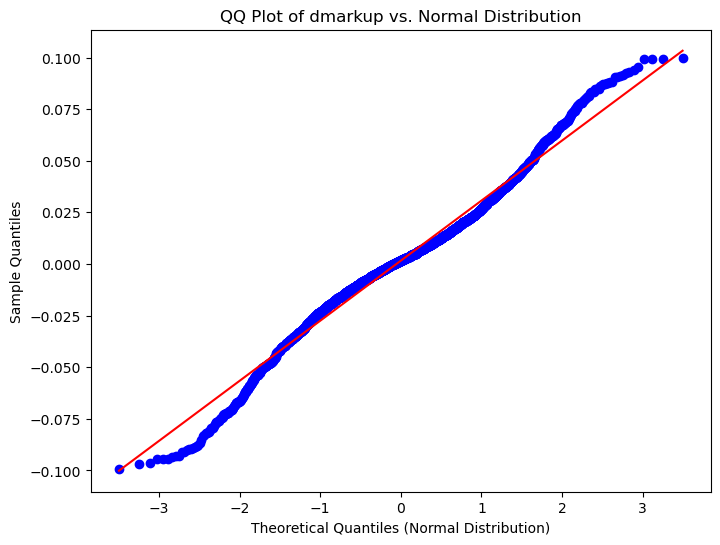

In [20]:
def plot_qq_plot(data, column_name):
    """Generates a QQ plot to compare data against a normal distribution."""
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column_name} vs. Normal Distribution')
    plt.ylabel("Sample Quantiles")
    plt.xlabel("Theoretical Quantiles (Normal Distribution)")
    plt.show()
    
plot_qq_plot(merged_data['dmarkup'], 'dmarkup')


## Analysis
Compare the distribution of these variables to a normal distribution. Are the variables fatter tailed than the normal distribution? Are there clear outliers that we should be worried about?

Sidenote: Are these two questions the same? Yes and no. 
"Fat tails" is about the population distribution. "Outliers" are about sample data. 
Fat tails are a property of the underlying distribution that causes a higher likelihood of observing extreme values and observing outliers is a consequence of this because you observe extreme values in a sample from that distribution. However, in terms of exploratory data analysis, it seems so. Winsorization is a method that addresses the impact of both fat tails (by reducing the influence of extreme values) and outliers (by capping them).

### Herfindahl
Yes, the Herfindahl variable is much fatter tailed than the normal distribution. This is seen by the S-shaped QQ plot, and the fact that the plot extends to multiple standard deviation events to around +/- 0.6. The far higher density of values centred just above zero is a consequence of fatter tails.

### Markups
The distribution of changes markups is much closer to the normal than the HHI. From the QQ plot, we can see there is very slight fat tails which means it will also be worth winorizing, but it's not nearly as drastic as the Herfindahl variable.

## Why Winsorize?

Reduces Outlier Impact: Outliers can exert undue influence on statistical models, particularly in regression. Winsorization reduces this influence by capping extreme values.

Data Preservation: Unlike simply removing outliers, winsorization retains all data points. It modifies extreme values rather than discarding them entirely. This can be important when you have limited data.

## How does winsorize work?

Percentile Selection: You choose percentiles to define the "tails" of your distribution. Common choices are the 1st and 99th percentile, or the 5th and 95th percentile. The choice depends on how extreme you believe the outliers are and how much you want to reduce their influence.

Threshold Calculation: For a chosen variable, you calculate:

The value at the lower percentile (e.g., 1st or 5th). This is your lower bound.
The value at the upper percentile (e.g., 99th or 95th). This is your upper bound.

Value Replacement (Capping):

Any value in the variable that is less than the lower bound is replaced by the lower bound value.
Any value in the variable that is greater than the upper bound is replaced by the upper bound value.
Values that fall between the lower and upper bounds are left unchanged.

In [46]:
# Column to winsorize
column_to_winsorize = 'dherfindahl'

# Define percentiles for 'dherfindahl' (example: 5th and 95th percentile)
lower_percentile_dherf = 0.05
upper_percentile_dherf = 0.95

# Calculate lower and upper bounds for 'dherfindahl'
lower_bound_value_dherf = merged_data[column_to_winsorize].quantile(lower_percentile_dherf)
upper_bound_value_dherf = merged_data[column_to_winsorize].quantile(upper_percentile_dherf)

# Create winsorized column for 'dherfindahl'
winsorized_column_name_dherf = f'{column_to_winsorize}_winsorized'
merged_data[winsorized_column_name_dherf] = merged_data[column_to_winsorize].clip(lower=lower_bound_value_dherf, upper=upper_bound_value_dherf)

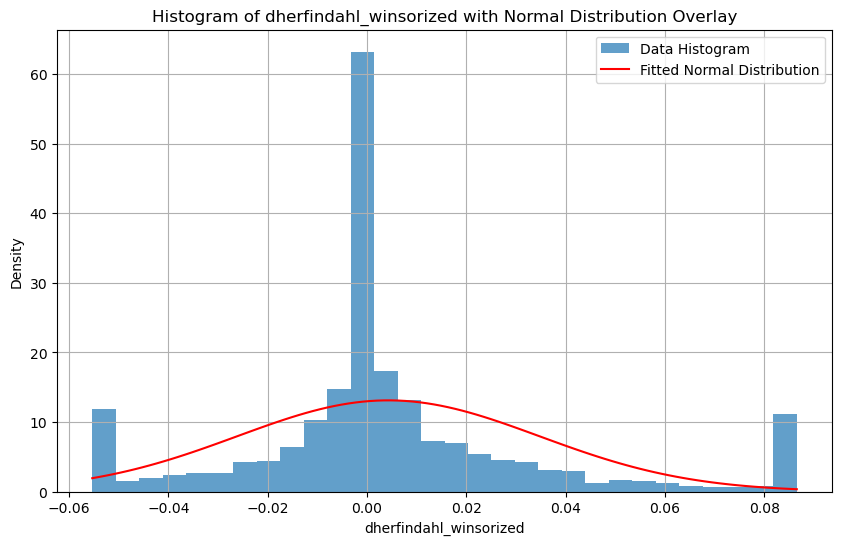

In [47]:
'''Now we can observe the distribution of the winorized variables, and do a feedback loop to '''

column_name = 'dherfindahl_winsorized'  # Replace with the actual column name you want to plot

# 2. Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(merged_data[column_name], bins=30, density=True, alpha=0.7, label='Data Histogram')  # Adjust bins and alpha

# 3. Fit a normal distribution to the data (optional, but often useful)
mu, sigma = stats.norm.fit(merged_data[column_name])  # Get mean (mu) and std dev (sigma)

# 4. Plot the normal distribution curve
x = np.linspace(merged_data[column_name].min(), merged_data[column_name].max(), 100)  # Create x-values for the curve
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', label='Fitted Normal Distribution')  # Plot the curve

# 5. Add labels and title
plt.xlabel(column_name)
plt.ylabel('Density')
plt.title(f'Histogram of {column_name} with Normal Distribution Overlay')
plt.legend()

# 6. Show the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.show()

In [48]:
# Column to winsorize
column_to_winsorize = 'dmarkup'

# Define percentiles for 'dmarkup' (example: 1% and 99th percentile - different from dherfindahl)
lower_percentile_dmarkup = 0.05
upper_percentile_dmarkup = 0.95

# Calculate lower and upper bounds for 'dmarkup'
lower_bound_value_dmarkup = merged_data[column_to_winsorize].quantile(lower_percentile_dmarkup)
upper_bound_value_dmarkup = merged_data[column_to_winsorize].quantile(upper_percentile_dmarkup)

# Create winsorized column for 'dmarkup'
winsorized_column_name_dmarkup = f'{column_to_winsorize}_winsorized'
merged_data[winsorized_column_name_dmarkup] = merged_data[column_to_winsorize].clip(lower=lower_bound_value_dmarkup, upper=upper_bound_value_dmarkup)

# Display the first few rows of original and winsorized 'dmarkup'
print(merged_data[['dmarkup', 'dmarkup_winsorized']].head())

    dmarkup  dmarkup_winsorized
0  0.011806            0.011806
1  0.010952            0.010952
2 -0.018640           -0.018640
3 -0.025250           -0.025250
4 -0.009341           -0.009341


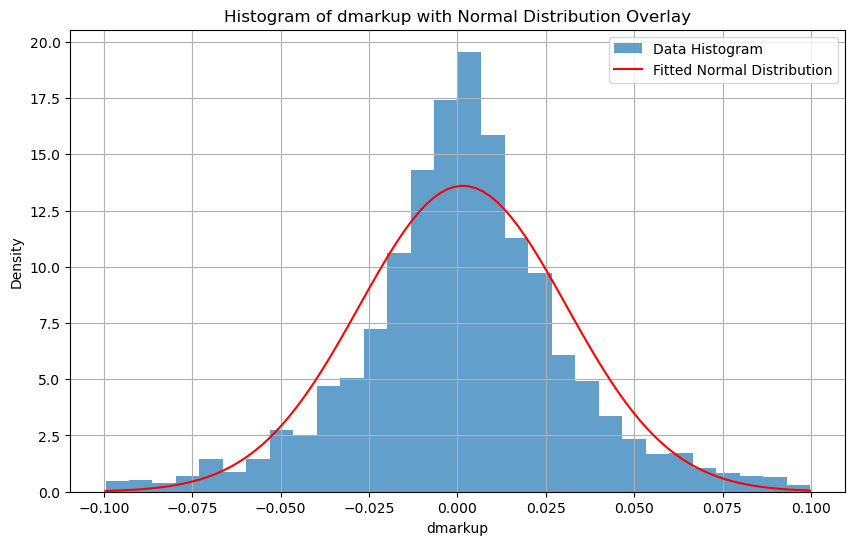

In [49]:

column_name = 'dmarkup'  # Replace with the actual column name you want to plot

# 2. Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(merged_data[column_name], bins=30, density=True, alpha=0.7, label='Data Histogram')  # Adjust bins and alpha

# 3. Fit a normal distribution to the data (optional, but often useful)
mu, sigma = stats.norm.fit(merged_data[column_name])  # Get mean (mu) and std dev (sigma)

# 4. Plot the normal distribution curve
x = np.linspace(merged_data[column_name].min(), merged_data[column_name].max(), 100)  # Create x-values for the curve
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', label='Fitted Normal Distribution')  # Plot the curve

# 5. Add labels and title
plt.xlabel(column_name)
plt.ylabel('Density')
plt.title(f'Histogram of {column_name} with Normal Distribution Overlay')
plt.legend()

# 6. Show the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.show()

In [50]:
# Display the first few rows with the new winsorized columns
print(merged_data[['dherfindahl', 'dherfindahl_winsorized', 'dmarkup', 'dmarkup_winsorized']].head())

   dherfindahl  dherfindahl_winsorized   dmarkup  dmarkup_winsorized
0    -0.012157               -0.012157  0.011806            0.011806
1     0.000619                0.000619  0.010952            0.010952
2    -0.017560               -0.017560 -0.018640           -0.018640
3    -0.005454               -0.005454 -0.025250           -0.025250
4    -0.006647               -0.006647 -0.009341           -0.009341


In [51]:
# Calculate the correlation between original and winsorized variables
correlation_dherf = merged_data['dherfindahl'].corr(merged_data['dherfindahl_winsorized'])
correlation_dmarkup = merged_data['dmarkup'].corr(merged_data['dmarkup_winsorized'])

print(f"\nCorrelation between original 'dherfindahl' and winsorized 'dherfindahl_winsorized': {correlation_dherf:.4f}")
print(f"Correlation between original 'dmarkup' and winsorized 'dmarkup_winsorized': {correlation_dmarkup:.4f}")


Correlation between original 'dherfindahl' and winsorized 'dherfindahl_winsorized': 0.7877
Correlation between original 'dmarkup' and winsorized 'dmarkup_winsorized': 0.9780


The interpretation of the correlation coeffients is that winorizing markups had hardly changed the distribution so there were very few outliers, whereas the correlation is much less for dherfindahl so the correlation is much less

\begin{equation}
\text{dherfindahl}_{i} = \beta_0 + \beta_1 \text{dmarkup}_{i} + \sum_{t} \gamma_t \mathbb{I}(\text{year}_{i} = t) + \sum_{j} \delta_j \mathbb{I}(\text{naics}_{i} = j) + \epsilon_{i}
\end{equation}

An alternative way to check the relationship between dherfindahl and dmarkup is to
plot a binned scatter plot. This is a scatter plot, where instead of showing individual
data points, it groups them into bins on a two-dimensional grid. Each bin represents
a range of values for the variables, and the color or density of the bin indicates the
number of data points falling within that range. This can be useful as a way of seeing
whether there is a clear linear relationship between the variables we are interested in.

In [52]:
# Regression 1: Original variables
reg1 = smf.ols('dherfindahl ~ dmarkup', data=merged_data).fit()
print("Regression 1: Original Variables")
print(reg1.summary())

# Regression 2: Winsorized variables
reg2 = smf.ols('dherfindahl_winsorized ~ dmarkup_winsorized', data=merged_data).fit()
print("\nRegression 2: Winsorized Variables")
print(reg2.summary())

Regression 1: Original Variables
                            OLS Regression Results                            
Dep. Variable:            dherfindahl   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.583
Date:                Wed, 19 Feb 2025   Prob (F-statistic):             0.0585
Time:                        08:53:02   Log-Likelihood:                 3543.6
No. Observations:                2940   AIC:                            -7083.
Df Residuals:                    2938   BIC:                            -7071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.00

In [55]:
# Regression 3: Original variables with year and naics_4 controls
reg3 = smf.ols('dherfindahl ~ dmarkup + C(year) + C(naics_4)', data=merged_data).fit()
print("\nRegression 3: Original Variables with Year and NAICS Controls")
print(reg3.summary())

# Regression 4: Winsorized variables with year and naics_4 controls
reg4 = smf.ols('dherfindahl_winsorized ~ dmarkup_winsorized + C(year) + C(naics_4)', data=merged_data).fit()
print("\nRegression 4: Winsorized Variables with Year and NAICS Controls")
print(reg4.summary())


Regression 3: Original Variables with Year and NAICS Controls
                            OLS Regression Results                            
Dep. Variable:            dherfindahl   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.6437
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               1.00
Time:                        08:59:01   Log-Likelihood:                 3612.9
No. Observations:                2940   AIC:                            -6804.
Df Residuals:                    2729   BIC:                            -5541.
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## Regression Intrepretation

Controlling for year and NAICS industry makes sense as they are potential confounders that affect both the change in mark-up and the HHI.

### Non-winorized variables
The estimate is not significant at the 5% confidence level. It's marginal and significant at 10% however. 

On average, increasing mark-ups by 1 

### Winorized variables
On average, holding fixed year and industry, an increase in the markup by one is associated with an increase of 0.0459 in the change in the Herfindahl–Hirschman index. 

An alternative way to check the relationship between dherfindahl and dmarkup is to
plot a binned scatter plot. This is a scatter plot, where instead of showing individual
data points, it groups them into bins on a two-dimensional grid. Each bin represents
a range of values for the variables, and the color or density of the bin indicates the
number of data points falling within that range. This can be useful as a way of seeing
whether there is a clear linear relationship between the variables we are interested in.

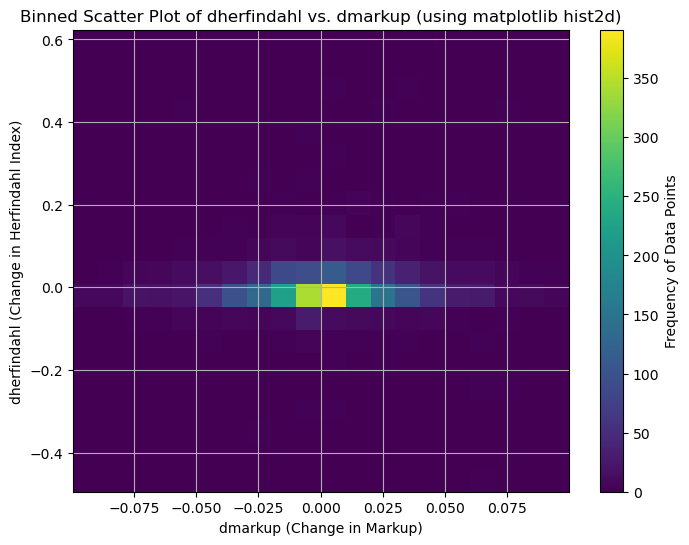

In [66]:
# Assume your merged_data DataFrame is already loaded

plt.figure(figsize=(8, 6))

# Use matplotlib's hist2d to create the binned scatter effect
heatmap = plt.hist2d(
    merged_data['dmarkup'],
    merged_data['dherfindahl'],
    bins=20,         # Adjust the number of bins as needed
    cmap=plt.cm.viridis # Choose a colormap (e.g., 'viridis', 'plasma', 'magma', 'cividis')
)

# Add a colorbar to the plot to show the density scale
cbar = plt.colorbar(heatmap[3]) # heatmap returns (hist, xedges, yedges, Image)
cbar.set_label('Frequency of Data Points')

plt.xlabel('dmarkup (Change in Markup)')
plt.ylabel('dherfindahl (Change in Herfindahl Index)')
plt.title('Binned Scatter Plot of dherfindahl vs. dmarkup')
plt.grid(True) # Optional: turn off grid for cleaner look
plt.show()

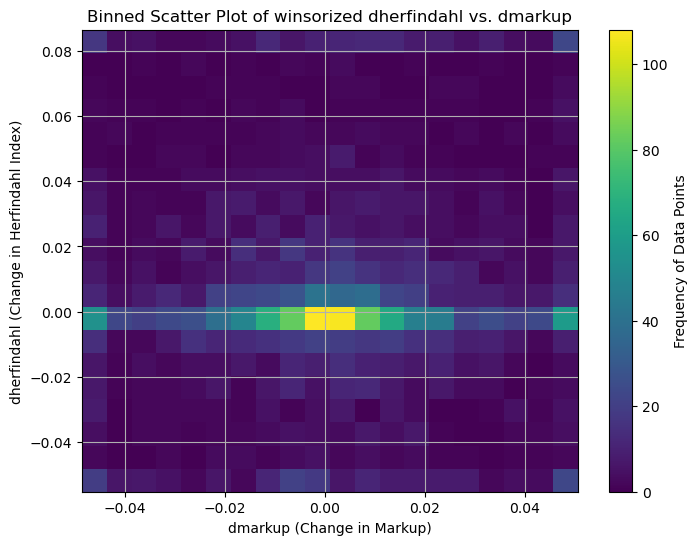

In [68]:
# Assume your merged_data DataFrame is already loaded

plt.figure(figsize=(8, 6))

# Use matplotlib's hist2d to create the binned scatter effect
heatmap = plt.hist2d(
    merged_data['dmarkup_winsorized'],
    merged_data['dherfindahl_winsorized'],
    bins=20,         # Adjust the number of bins as needed
    cmap=plt.cm.viridis # Choose a colormap (e.g., 'viridis', 'plasma', 'magma', 'cividis')
)

# Add a colorbar to the plot to show the density scale
cbar = plt.colorbar(heatmap[3]) # heatmap returns (hist, xedges, yedges, Image)
cbar.set_label('Frequency of Data Points')

plt.xlabel('dmarkup (Change in Markup)')
plt.ylabel('dherfindahl (Change in Herfindahl Index)')
plt.title('Binned Scatter Plot of winsorized dherfindahl vs. dmarkup')
plt.grid(True) # Optional: turn off grid for cleaner look
plt.show()

In both of the binned scatter plots, it seems there's no a clear relationship. By far the highest frequency is at the (0,0) bin. 